The following code tests the MALA sampler on a toy problem of 1-dimensional Bayesian Linear Regression.

In [1]:
%cd "../../"
import torch
import numpy as np
from matplotlib import pyplot as plt

/m/home/home5/56/kapoorj1/unix/repos/bayesian-ode


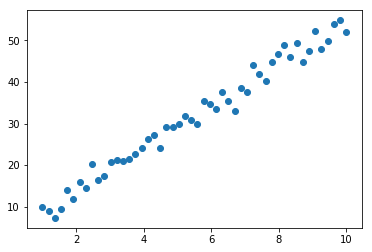

In [11]:

x_data = torch.Tensor([[x] for x in np.linspace(1, 10)])
w_true = 5
b_true = 4
y_data = x_data*w_true + b_true
y_data += torch.randn(y_data.size())*2
plt.scatter(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in y_data.data]))


In [12]:

# class MODEL(torch.nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.linear = torch.nn.Linear(1, 100)
#         self.linear2 = torch.nn.Linear(100, 1)
        
#     def forward(self, x):
#         y = self.linear(x)
#         z = self.linear2(y)
#         return y
    
class MODEL(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        y = self.linear(x)
        return y



In [4]:
from samplers.metrics import eval_full_hessian, SoftAbsMetric

def hess_closure():
    return eval_full_hessian(torch.autograd.grad(closure(), model.parameters(), create_graph=True), model.parameters())

metric = SoftAbsMetric(closure=hess_closure)

In [13]:
def closure(add_prior=True):
    criterion = torch.nn.MSELoss(reduction='sum')
    loss = criterion(model(x_data), y_data)/(2.0**2)
    lambda_ = 0.3
    if add_prior:
        for p in model.parameters():
            loss += lambda_ * p.pow(2).sum()
    return loss


In [14]:
model = MODEL()

from samplers.langevin import MALA, SGLD, MMALA, HAMCMC
# sampler = MALA(model.parameters(), lr = 0.0001, add_noise=True)
sampler = SGLD(model.parameters(), lr0=0.003, gamma=0.55, t0=100, alpha=0.1)
# sampler = MMALA(model.parameters(), metric_obj=metric, lr=0.00001)
# chain, logp_array = sampler.sample(closure, burn_in=1000, num_samples=200)

chain, logp_array = sampler.sample(closure, burn_in=2000, num_samples=2000, print_loss=True)

# sampler = HAMCMC(model.parameters(), lr0=1e-3, lr_gamma=0.55, lr_t0=100, lr_alpha=1, trust_reg=0., memory=3, H_gamma=1e-1, cholesky_factor=1e-1)
# chain, logp_array = sampler.sample(closure, burn_in=2000, num_samples=2000, print_loss=True, use_metric=True, use_old_lbfgs=True)

<class 'dict'>
Burn-in phase started
Burn-in iter 0001 | loss 7359.562988
Burn-in iter 0002 | loss 4576.208496
Burn-in iter 0003 | loss 2699.976318
Burn-in iter 0004 | loss 1667.747437
Burn-in iter 0005 | loss 1011.170288
Burn-in iter 0006 | loss 634.778625
Burn-in iter 0007 | loss 397.374237
Burn-in iter 0008 | loss 260.020996
Burn-in iter 0009 | loss 197.598465
Burn-in iter 0010 | loss 155.596146
Burn-in iter 0011 | loss 129.395798
Burn-in iter 0012 | loss 108.510124
Burn-in iter 0013 | loss 104.152161
Burn-in iter 0014 | loss 92.494560
Burn-in iter 0015 | loss 83.315094
Burn-in iter 0016 | loss 83.009308
Burn-in iter 0017 | loss 82.482727
Burn-in iter 0018 | loss 81.011841
Burn-in iter 0019 | loss 81.963173
Burn-in iter 0020 | loss 80.903648
Burn-in iter 0021 | loss 80.836975
Burn-in iter 0022 | loss 81.519348
Burn-in iter 0023 | loss 80.647064
Burn-in iter 0024 | loss 81.793449
Burn-in iter 0025 | loss 80.065651
Burn-in iter 0026 | loss 80.389694
Burn-in iter 0027 | loss 80.177124


Burn-in iter 0324 | loss 64.970207
Burn-in iter 0325 | loss 65.006714
Burn-in iter 0326 | loss 65.310951
Burn-in iter 0327 | loss 66.323532
Burn-in iter 0328 | loss 65.428566
Burn-in iter 0329 | loss 65.310593
Burn-in iter 0330 | loss 65.439613
Burn-in iter 0331 | loss 65.221436
Burn-in iter 0332 | loss 64.882790
Burn-in iter 0333 | loss 64.617378
Burn-in iter 0334 | loss 66.721970
Burn-in iter 0335 | loss 67.371872
Burn-in iter 0336 | loss 66.383568
Burn-in iter 0337 | loss 67.734665
Burn-in iter 0338 | loss 66.713867
Burn-in iter 0339 | loss 67.061607
Burn-in iter 0340 | loss 67.780670
Burn-in iter 0341 | loss 67.327789
Burn-in iter 0342 | loss 67.465263
Burn-in iter 0343 | loss 67.869049
Burn-in iter 0344 | loss 67.188103
Burn-in iter 0345 | loss 67.755112
Burn-in iter 0346 | loss 68.402267
Burn-in iter 0347 | loss 68.519234
Burn-in iter 0348 | loss 65.891296
Burn-in iter 0349 | loss 66.148178
Burn-in iter 0350 | loss 66.195358
Burn-in iter 0351 | loss 65.910385
Burn-in iter 0352 | 

Burn-in iter 0650 | loss 59.256100
Burn-in iter 0651 | loss 59.018600
Burn-in iter 0652 | loss 59.393772
Burn-in iter 0653 | loss 58.758030
Burn-in iter 0654 | loss 59.239620
Burn-in iter 0655 | loss 58.922153
Burn-in iter 0656 | loss 58.808945
Burn-in iter 0657 | loss 58.907372
Burn-in iter 0658 | loss 59.586430
Burn-in iter 0659 | loss 59.760078
Burn-in iter 0660 | loss 59.201580
Burn-in iter 0661 | loss 60.197796
Burn-in iter 0662 | loss 61.031967
Burn-in iter 0663 | loss 61.569099
Burn-in iter 0664 | loss 60.743393
Burn-in iter 0665 | loss 59.911373
Burn-in iter 0666 | loss 61.560669
Burn-in iter 0667 | loss 60.187622
Burn-in iter 0668 | loss 59.315964
Burn-in iter 0669 | loss 59.362671
Burn-in iter 0670 | loss 59.031681
Burn-in iter 0671 | loss 59.108150
Burn-in iter 0672 | loss 58.902832
Burn-in iter 0673 | loss 58.705208
Burn-in iter 0674 | loss 58.478672
Burn-in iter 0675 | loss 58.816849
Burn-in iter 0676 | loss 58.537643
Burn-in iter 0677 | loss 58.388256
Burn-in iter 0678 | 

Burn-in iter 0966 | loss 58.796009
Burn-in iter 0967 | loss 59.631748
Burn-in iter 0968 | loss 59.604618
Burn-in iter 0969 | loss 59.272064
Burn-in iter 0970 | loss 58.543831
Burn-in iter 0971 | loss 59.324726
Burn-in iter 0972 | loss 58.976074
Burn-in iter 0973 | loss 58.998512
Burn-in iter 0974 | loss 59.171455
Burn-in iter 0975 | loss 60.077957
Burn-in iter 0976 | loss 61.302094
Burn-in iter 0977 | loss 58.873306
Burn-in iter 0978 | loss 59.600609
Burn-in iter 0979 | loss 58.580257
Burn-in iter 0980 | loss 58.953850
Burn-in iter 0981 | loss 58.001053
Burn-in iter 0982 | loss 57.953995
Burn-in iter 0983 | loss 57.921688
Burn-in iter 0984 | loss 58.226952
Burn-in iter 0985 | loss 57.405186
Burn-in iter 0986 | loss 57.164005
Burn-in iter 0987 | loss 57.221603
Burn-in iter 0988 | loss 57.257092
Burn-in iter 0989 | loss 57.748497
Burn-in iter 0990 | loss 57.854565
Burn-in iter 0991 | loss 57.877602
Burn-in iter 0992 | loss 58.468460
Burn-in iter 0993 | loss 57.939007
Burn-in iter 0994 | 

Burn-in iter 1273 | loss 52.893890
Burn-in iter 1274 | loss 53.047375
Burn-in iter 1275 | loss 53.237286
Burn-in iter 1276 | loss 52.622349
Burn-in iter 1277 | loss 52.654655
Burn-in iter 1278 | loss 52.706295
Burn-in iter 1279 | loss 52.723751
Burn-in iter 1280 | loss 52.831192
Burn-in iter 1281 | loss 52.699390
Burn-in iter 1282 | loss 52.892960
Burn-in iter 1283 | loss 53.256630
Burn-in iter 1284 | loss 53.428074
Burn-in iter 1285 | loss 53.140461
Burn-in iter 1286 | loss 52.954353
Burn-in iter 1287 | loss 52.766479
Burn-in iter 1288 | loss 53.205090
Burn-in iter 1289 | loss 53.163319
Burn-in iter 1290 | loss 53.253365
Burn-in iter 1291 | loss 52.828842
Burn-in iter 1292 | loss 52.992229
Burn-in iter 1293 | loss 53.153255
Burn-in iter 1294 | loss 52.994263
Burn-in iter 1295 | loss 53.000206
Burn-in iter 1296 | loss 52.881908
Burn-in iter 1297 | loss 53.106487
Burn-in iter 1298 | loss 52.991253
Burn-in iter 1299 | loss 53.145386
Burn-in iter 1300 | loss 52.927429
Burn-in iter 1301 | 

Burn-in iter 1539 | loss 52.274879
Burn-in iter 1540 | loss 52.012363
Burn-in iter 1541 | loss 52.064892
Burn-in iter 1542 | loss 52.258907
Burn-in iter 1543 | loss 52.253777
Burn-in iter 1544 | loss 52.306469
Burn-in iter 1545 | loss 53.008961
Burn-in iter 1546 | loss 53.562874
Burn-in iter 1547 | loss 53.923988
Burn-in iter 1548 | loss 53.728981
Burn-in iter 1549 | loss 53.568653
Burn-in iter 1550 | loss 52.847382
Burn-in iter 1551 | loss 53.068169
Burn-in iter 1552 | loss 53.084305
Burn-in iter 1553 | loss 52.552063
Burn-in iter 1554 | loss 52.700855
Burn-in iter 1555 | loss 52.300983
Burn-in iter 1556 | loss 52.032894
Burn-in iter 1557 | loss 52.474110
Burn-in iter 1558 | loss 54.723572
Burn-in iter 1559 | loss 52.140709
Burn-in iter 1560 | loss 52.075253
Burn-in iter 1561 | loss 52.058357
Burn-in iter 1562 | loss 52.156448
Burn-in iter 1563 | loss 52.007927
Burn-in iter 1564 | loss 52.381145
Burn-in iter 1565 | loss 52.146255
Burn-in iter 1566 | loss 52.066029
Burn-in iter 1567 | 

Burn-in iter 1851 | loss 51.943310
Burn-in iter 1852 | loss 50.579281
Burn-in iter 1853 | loss 51.050087
Burn-in iter 1854 | loss 51.250931
Burn-in iter 1855 | loss 52.223515
Burn-in iter 1856 | loss 50.772808
Burn-in iter 1857 | loss 50.604549
Burn-in iter 1858 | loss 50.466896
Burn-in iter 1859 | loss 50.426743
Burn-in iter 1860 | loss 50.521492
Burn-in iter 1861 | loss 50.409370
Burn-in iter 1862 | loss 50.494034
Burn-in iter 1863 | loss 50.540680
Burn-in iter 1864 | loss 50.501007
Burn-in iter 1865 | loss 50.663750
Burn-in iter 1866 | loss 50.828663
Burn-in iter 1867 | loss 50.698715
Burn-in iter 1868 | loss 50.819187
Burn-in iter 1869 | loss 51.238003
Burn-in iter 1870 | loss 50.559021
Burn-in iter 1871 | loss 50.630852
Burn-in iter 1872 | loss 50.735439
Burn-in iter 1873 | loss 50.526390
Burn-in iter 1874 | loss 50.482563
Burn-in iter 1875 | loss 50.389935
Burn-in iter 1876 | loss 50.254581
Burn-in iter 1877 | loss 50.330021
Burn-in iter 1878 | loss 50.377853
Burn-in iter 1879 | 

Sample iter 0161 | loss 48.525978
Sample iter 0162 | loss 48.103680
Sample iter 0163 | loss 48.099152
Sample iter 0164 | loss 48.020130
Sample iter 0165 | loss 48.284111
Sample iter 0166 | loss 48.390106
Sample iter 0167 | loss 48.204720
Sample iter 0168 | loss 48.218281
Sample iter 0169 | loss 47.955612
Sample iter 0170 | loss 47.847763
Sample iter 0171 | loss 48.112144
Sample iter 0172 | loss 48.187698
Sample iter 0173 | loss 47.837399
Sample iter 0174 | loss 48.005383
Sample iter 0175 | loss 47.721397
Sample iter 0176 | loss 47.667675
Sample iter 0177 | loss 47.707245
Sample iter 0178 | loss 48.238976
Sample iter 0179 | loss 49.946701
Sample iter 0180 | loss 49.737827
Sample iter 0181 | loss 51.788471
Sample iter 0182 | loss 50.442608
Sample iter 0183 | loss 49.944717
Sample iter 0184 | loss 48.383770
Sample iter 0185 | loss 48.599583
Sample iter 0186 | loss 48.065205
Sample iter 0187 | loss 47.882786
Sample iter 0188 | loss 47.929630
Sample iter 0189 | loss 47.698036
Sample iter 01

Sample iter 0466 | loss 47.990288
Sample iter 0467 | loss 48.082897
Sample iter 0468 | loss 48.340969
Sample iter 0469 | loss 48.328213
Sample iter 0470 | loss 48.360455
Sample iter 0471 | loss 48.240593
Sample iter 0472 | loss 48.090000
Sample iter 0473 | loss 47.716213
Sample iter 0474 | loss 48.064594
Sample iter 0475 | loss 47.698090
Sample iter 0476 | loss 48.691017
Sample iter 0477 | loss 48.875957
Sample iter 0478 | loss 48.149242
Sample iter 0479 | loss 47.999504
Sample iter 0480 | loss 48.600784
Sample iter 0481 | loss 49.356537
Sample iter 0482 | loss 50.186089
Sample iter 0483 | loss 49.626034
Sample iter 0484 | loss 48.430340
Sample iter 0485 | loss 49.112335
Sample iter 0486 | loss 47.884254
Sample iter 0487 | loss 47.823669
Sample iter 0488 | loss 47.918526
Sample iter 0489 | loss 48.298985
Sample iter 0490 | loss 48.439819
Sample iter 0491 | loss 48.583351
Sample iter 0492 | loss 48.479591
Sample iter 0493 | loss 47.807419
Sample iter 0494 | loss 48.005836
Sample iter 04

Sample iter 0772 | loss 47.703831
Sample iter 0773 | loss 47.867722
Sample iter 0774 | loss 48.246677
Sample iter 0775 | loss 47.974922
Sample iter 0776 | loss 47.978024
Sample iter 0777 | loss 47.734051
Sample iter 0778 | loss 47.966370
Sample iter 0779 | loss 48.958370
Sample iter 0780 | loss 49.030205
Sample iter 0781 | loss 49.234486
Sample iter 0782 | loss 49.620777
Sample iter 0783 | loss 48.429749
Sample iter 0784 | loss 48.523712
Sample iter 0785 | loss 49.349174
Sample iter 0786 | loss 48.146061
Sample iter 0787 | loss 47.891460
Sample iter 0788 | loss 47.754883
Sample iter 0789 | loss 47.764740
Sample iter 0790 | loss 48.301445
Sample iter 0791 | loss 48.236000
Sample iter 0792 | loss 48.068577
Sample iter 0793 | loss 48.092823
Sample iter 0794 | loss 47.861244
Sample iter 0795 | loss 47.860210
Sample iter 0796 | loss 47.853153
Sample iter 0797 | loss 47.926327
Sample iter 0798 | loss 47.976261
Sample iter 0799 | loss 48.032822
Sample iter 0800 | loss 48.112846
Sample iter 08

Sample iter 1077 | loss 47.548367
Sample iter 1078 | loss 47.751804
Sample iter 1079 | loss 47.537857
Sample iter 1080 | loss 47.489151
Sample iter 1081 | loss 47.458073
Sample iter 1082 | loss 47.454815
Sample iter 1083 | loss 47.480858
Sample iter 1084 | loss 47.478046
Sample iter 1085 | loss 47.594501
Sample iter 1086 | loss 47.539143
Sample iter 1087 | loss 47.477489
Sample iter 1088 | loss 48.027069
Sample iter 1089 | loss 48.322319
Sample iter 1090 | loss 48.034580
Sample iter 1091 | loss 47.686512
Sample iter 1092 | loss 47.472176
Sample iter 1093 | loss 47.476841
Sample iter 1094 | loss 47.478008
Sample iter 1095 | loss 47.609230
Sample iter 1096 | loss 47.601852
Sample iter 1097 | loss 47.483566
Sample iter 1098 | loss 47.495361
Sample iter 1099 | loss 47.452145
Sample iter 1100 | loss 47.553440
Sample iter 1101 | loss 47.504753
Sample iter 1102 | loss 47.561783
Sample iter 1103 | loss 47.455780
Sample iter 1104 | loss 47.471901
Sample iter 1105 | loss 47.449585
Sample iter 11

Sample iter 1383 | loss 48.638721
Sample iter 1384 | loss 47.804405
Sample iter 1385 | loss 48.005909
Sample iter 1386 | loss 47.665237
Sample iter 1387 | loss 47.422504
Sample iter 1388 | loss 47.419785
Sample iter 1389 | loss 47.466576
Sample iter 1390 | loss 47.705688
Sample iter 1391 | loss 47.487827
Sample iter 1392 | loss 47.450241
Sample iter 1393 | loss 47.526577
Sample iter 1394 | loss 47.459587
Sample iter 1395 | loss 47.426064
Sample iter 1396 | loss 47.722603
Sample iter 1397 | loss 48.545959
Sample iter 1398 | loss 48.444527
Sample iter 1399 | loss 49.169685
Sample iter 1400 | loss 49.465782
Sample iter 1401 | loss 48.134396
Sample iter 1402 | loss 48.362362
Sample iter 1403 | loss 47.666309
Sample iter 1404 | loss 47.659920
Sample iter 1405 | loss 47.781101
Sample iter 1406 | loss 47.492298
Sample iter 1407 | loss 47.705044
Sample iter 1408 | loss 47.533016
Sample iter 1409 | loss 47.419727
Sample iter 1410 | loss 47.452888
Sample iter 1411 | loss 47.438999
Sample iter 14

Sample iter 1688 | loss 47.754021
Sample iter 1689 | loss 47.764179
Sample iter 1690 | loss 47.733353
Sample iter 1691 | loss 47.767273
Sample iter 1692 | loss 47.871441
Sample iter 1693 | loss 47.781902
Sample iter 1694 | loss 47.780315
Sample iter 1695 | loss 47.795258
Sample iter 1696 | loss 47.930622
Sample iter 1697 | loss 47.817696
Sample iter 1698 | loss 48.363819
Sample iter 1699 | loss 48.894581
Sample iter 1700 | loss 48.723587
Sample iter 1701 | loss 48.656574
Sample iter 1702 | loss 48.008919
Sample iter 1703 | loss 48.191910
Sample iter 1704 | loss 48.808975
Sample iter 1705 | loss 48.709930
Sample iter 1706 | loss 49.201607
Sample iter 1707 | loss 48.404503
Sample iter 1708 | loss 48.141132
Sample iter 1709 | loss 48.116089
Sample iter 1710 | loss 47.995766
Sample iter 1711 | loss 48.356892
Sample iter 1712 | loss 48.778126
Sample iter 1713 | loss 48.356792
Sample iter 1714 | loss 48.264194
Sample iter 1715 | loss 48.068710
Sample iter 1716 | loss 48.140556
Sample iter 17

Sample iter 1994 | loss 48.310169
Sample iter 1995 | loss 48.180935
Sample iter 1996 | loss 48.168911
Sample iter 1997 | loss 48.444538
Sample iter 1998 | loss 48.401398
Sample iter 1999 | loss 48.477798
Sample iter 2000 | loss 48.165001


5.0936403

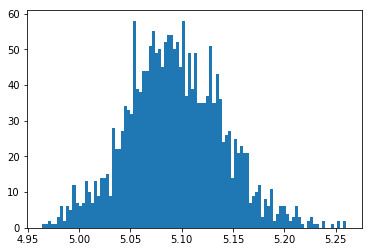

In [15]:
# plt.scatter(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in model(x_data).data]))
plt.hist([i[0][0][0][0][0] for i in chain if i[1]], bins=100)
np.mean([i[0][0][0][0][0] for i in chain if i[1]])

3.646603

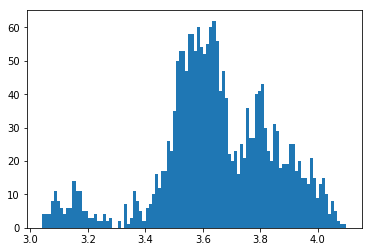

In [16]:
plt.hist([i[0][0][1][0] for i in chain if i[1]], bins=100)

np.mean([i[0][0][1][0] for i in chain if i[1]])

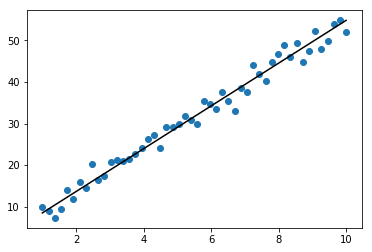

In [17]:
plt.scatter(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in y_data.data]))
plt.plot(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in model(x_data).data]), c='k')


In [ ]:
from samplers.utils import eval_hessian

hess = eval_hessian(torch.autograd.grad(closure(), model.parameters(), create_graph=True), model)

In [ ]:
chain
